# Mn 54

   Channel  Counts
0        0       0
1        1       0
2        2       0
3        3       0
4        4       0


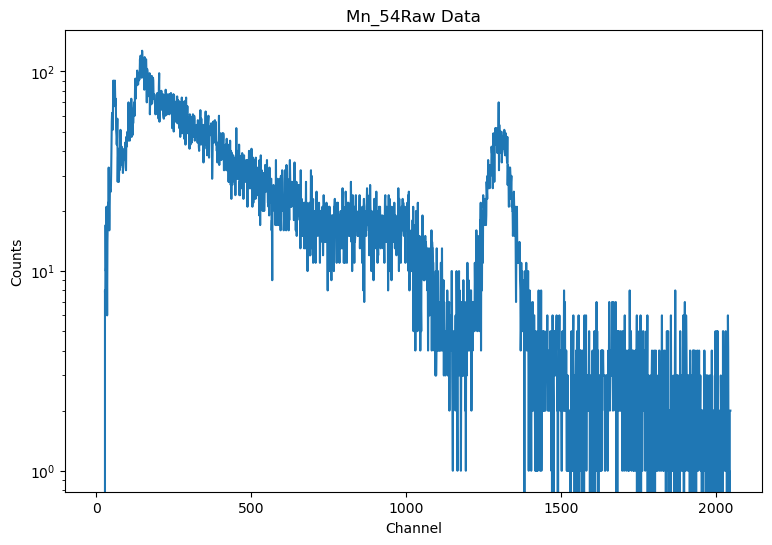

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#convert csv file to pd data frame (df), check first 10 values with df.head

Mn_54_df = pd.read_csv("Mn_54.csv")
print(Mn_54_df.head())

# label x and y df columns & make raw data plot

Mn_54_x = Mn_54_df["Channel"]
Mn_54_y = Mn_54_df["Counts"]

plt.figure(figsize=(9,6))
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Mn_54 Raw Data")

# use semi log y bc the analyzer is log based

plt.semilogy(Mn_54_x, Mn_54_y)
plt.show()

# Peak: 0.835 MeV

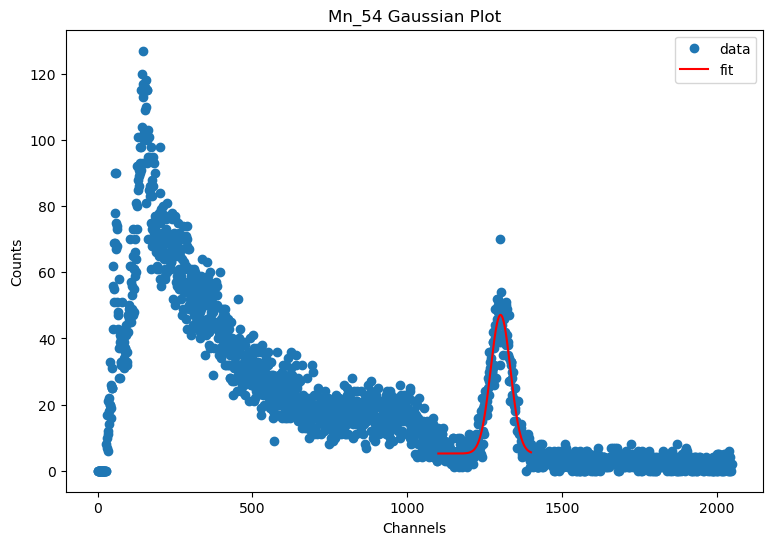

Fit Amplitude:  41.92469380367792 ± 0.7112365611507361 
 Fit Mean:  1300.8010469480037 ± 0.5842551178756725 
 Fit Epsilon:  1021.0366718706791 ± 44.34581918994001 
 Fit C :  5.204580274445905 ± 0.3541116533950279


In [15]:
# define gaussian function with constants names 
def gaus(x, a, m, e, c):
    fit = a*np.exp(( -(x - m)**2) / (2 * e) ) + c
    return fit

# define x and y value ranges for gaussian
Mn_54_x_slice = Mn_54_x[1100:1400]
Mn_54_y_slice = Mn_54_y[1100:1400]

# define popt and pcov, solve for a, m, e, and c
Mn_54_popt, Mn_54_pcov = curve_fit( gaus, Mn_54_x_slice, Mn_54_y_slice, p0 = [a:=50, m:=1300, e:=1100, c:=0])

#create gaussian with fitted values
Mn_54_y_fit = gaus( Mn_54_x_slice, *Mn_54_popt)

# plot fit curve
plt.figure(figsize=(9,6))
plt.plot(Mn_54_x, Mn_54_y, 'o', label="data")
plt.plot(Mn_54_x_slice, Mn_54_y_fit, 'r-', label='fit')
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Mn_54 Gaussian Plot")
plt.legend()
plt.show()

# print fit values of gaussian constants & uncertainties (sigma)
sigma = np.sqrt(np.diag(Mn_54_pcov))          

print("Fit Amplitude: ", Mn_54_popt[0], u"\u00B1" , sigma[0],
        "\n Fit Mean: ", Mn_54_popt[1], u"\u00B1", sigma[1],
        "\n Fit Epsilon: ", Mn_54_popt[2], u"\u00B1", sigma[2],
        "\n Fit C : ", Mn_54_popt[3], u"\u00B1", sigma[3])